## Analisis Data Sektor Pariwisata di Indonesia untuk Mendapatkan Informasi yang Menarik ##


### Kelompok 6 Ilmu Komputer Kelas C2 ###
1. Naufal Fakhri Al-Najieb (2309648)
2. Abdurrahman Rauf Budiman (2301102)
3. Haniel Septian Putra Alren (2310978)
4. Muhammad Radhi Maulana (2311119)
5. Yoga Ilham Prasetio (2304539)

### Pendahuluan
Pariwisata adalah perjalanan dari satu tempat ke tempat lain, bersifat sementara dilakukan oleh perorangan ataupun kelompok sebagai usaha mencari keseimbangan atau keserasian dan kebahagiaan dengan lingkungan hidup dalam dimensi sosial, budaya, alam, dan ilmu (Spillane, dalam Pitana, 2001).

Analisis merupakan kegiatan yang mengidentifikasi dan menguraikan apa saja yang terjadi untuk menemukan solusi dan fungsi dari kegiatan yang dilakukan (Ghoet al, 2019), sedangkan data  mining merupakan kegiatan  meliputi  pengumpulan,  pemakaian  data  historis dalam menemukan keteraturan, pola, atau hubungan dalam dataset berukuran besar. Output dari data mining ini bisa dipakai untuk memperbaiki pengambilan keputusan di masa depan (Suyanto, 2017). 

Pada laporan ini, kami melakukan analisis data sektor pariwisata di Indonesia berdasarkan dataset dari website Badan Pusat Statistik (https://www.bps.go.id/). Alasan kami memilih tema pariwisata karena tingkat variasi data yang tersedia sangat beragam. Selain itu, ketersediaan data per tahunnya lengkap.  

### Load Dataset

In [173]:
#Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#Load Dataset
data_Jumlah_Tamu_Indonesia_Hotel = pd.read_csv("Jumlah Tamu Indonesia pada Hotel Bintang, 2021-2023.csv")
data_Jumlah_Tamu_Asing_Hotel = pd.read_csv("Jumlah Tamu Asing pada Hotel Bintang, 2021-2023.csv")
data_lama_menginap_tamu_1 = pd.read_csv("Rata-Rata Lama Menginap Tamu Pada Hotel Bintang Menurut Provinsi, 2021-2023.csv")

data_Pengeluaran_Wisatawan_1 = pd.read_csv("Rata-Rata Pengeluaran Wisatawan Mancanegara per Kunjungan Menurut Negara Tempat Tinggal , 2019-2021.csv")
data_Pengeluaran_Wisatawan_2 = pd.read_csv("Rata-Rata Pengeluaran Wisatawan Mancanegara per Kunjungan Menurut Negara Tempat Tinggal , 2022-2023.csv")

data_Lama_Tinggal_Wisatawan_Mancanegara_1 = pd.read_csv("Rata-Rata Lama Tinggal Wisatawan Mancanegara Menurut Negara Tempat Tinggal, 2019-2021.csv")
data_Lama_Tinggal_Wisatawan_Mancanegara_2 = pd.read_csv("Rata-Rata Lama Tinggal Wisatawan Mancanegara Menurut Negara Tempat Tinggal, 2022-2023.csv")

data_Jumlah_Kunjungan = pd.read_csv("Jumlah Kunjungan Wisatawan Mancanegara ke Indonesia Menurut Kebangsaan, 2021-2023.csv")
data_devisa_Indonesia = pd.read_csv("Jumlah Devisa Sektor Pariwisata, 2021-2022.csv")

data_Akomodasi_Hotel_1 = pd.read_csv("Jumlah Akomodasi, Kamar, dan Tempat Tidur yang Tersedia pada Hotel Bintang, 2019-2021.csv")
data_Akomodasi_Hotel_2 = pd.read_csv("Jumlah Akomodasi, Kamar, dan Tempat Tidur yang Tersedia pada Hotel Bintang, 2022-2023.csv")

### Data Filter

**1. Data Tamu Indonesia yang Menginap di Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data tamu Indonesia yang menginap di hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah tamu Indonesia (ribuan orang per tahun), serta data jumlah tamu tiap tahunnya per provinsi lokasi hotel berbintang yang dikunjungi. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [175]:
data_Jumlah_Tamu_Indonesia_Hotel = data_Jumlah_Tamu_Indonesia_Hotel.drop(38).dropna().reset_index(drop=True)
data_Jumlah_Tamu_Indonesia_Hotel.index += 1
data_Jumlah_Tamu_Indonesia_Hotel.replace('-', np.nan, inplace=True)

In [176]:
tempor = data_Jumlah_Tamu_Indonesia_Hotel
tempor = tempor.dropna().reset_index(drop=True)
mean_asing_indo = tempor[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()

data_Jumlah_Tamu_Indonesia_Hotel[["2021", "2022", "2023"]] = data_Jumlah_Tamu_Indonesia_Hotel[["2021", "2022", "2023"]].fillna(mean_asing_indo)
data_Jumlah_Tamu_Indonesia_Hotel.head(10)

,38 Provinsi,2021,2022,2023
1,ACEH,195.25,265,329.90
2,SUMATERA UTARA,1937.91,2748.71,2933.70
3,SUMATERA BARAT,1175.55,1469.14,1434.66
4,RIAU,1341.38,1795.91,1923.57
5,JAMBI,386.67,598.32,620.39
6,SUMATERA SELATAN,1502.83,1866.43,1957.90
7,BENGKULU,197.24,231.62,275.91
8,LAMPUNG,642.8,779.99,778.02
9,KEP. BANGKA BELITUNG,312.46,453.96,499.14
10,KEP. RIAU,824.02,1232.07,1316.21


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Provinsi | Lokasi daerah yang dikunjungi tamu Indonesia |
| 2021 | Jumlah tamu pada tahun 2021 |
| 2022 | Jumlah tamu pada tahun 2022 |
| 2023 | Jumlah tamu pada tahun 2023 |

**2. Data Tamu Asing yang Menginap di Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data tamu asing yang menginap di hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah tamu asing (ribuan orang per tahun), serta data jumlah tamu tiap tahunnya per provinsi lokasi hotel berbintang yang dikunjungi. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [177]:
data_Jumlah_Tamu_Asing_Hotel = data_Jumlah_Tamu_Asing_Hotel.dropna().reset_index(drop=True)
data_Jumlah_Tamu_Asing_Hotel.index += 1
data_Jumlah_Tamu_Asing_Hotel.replace('-', np.nan, inplace=True)

In [178]:
temp = data_Jumlah_Tamu_Asing_Hotel
temp = temp.dropna().reset_index(drop=True)
mean_asing = temp[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()

data_Jumlah_Tamu_Asing_Hotel[["2021", "2022", "2023"]] = data_Jumlah_Tamu_Asing_Hotel[["2021", "2022", "2023"]].fillna(mean_asing)
data_Jumlah_Tamu_Asing_Hotel.head(10)

,PROVINSI,2021,2022,2023
1,ACEH,0.12,0.88,7.30
2,SUMATERA UTARA,4.93,32.05,113.33
3,SUMATERA BARAT,2.37,9.91,30.06
4,RIAU,5.41,10.34,14.93
5,JAMBI,0.81,2.08,3.37
6,SUMATERA SELATAN,3.23,4.7,7.55
7,BENGKULU,0.03,0.12,0.42
8,LAMPUNG,0.57,1.65,3.47
9,KEP. BANGKA BELITUNG,0.58,2.92,4.82
10,KEP. RIAU,30.3,375.36,700.55


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Provinsi | Lokasi daerah yang dikunjungi tamu asing |
| 2021 | Jumlah tamu pada tahun 2021 |
| 2022 | Jumlah tamu pada tahun 2022 |
| 2023 | Jumlah tamu pada tahun 2023 |

**3. Data Pengeluaran Wisatawan Mancanegara 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data pengeluaran wisatawan mancanegara dari tahun 2021-2023. Data yang ditampilkan merupakan jumlah pengeluaran wisatawan mancanegara tiap kunjungan per tahun, serta data jumlah pengeluaran wisatawan mancanegara tiap tahunnya, berdasarkan asal wisatawan. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [179]:
data_Pengeluaran_Wisatawan_1.index += 1
data_Pengeluaran_Wisatawan_1.replace('-', np.nan, inplace=True)

data_Pengeluaran_Wisatawan_2.index += 1
data_Pengeluaran_Wisatawan_2.replace('-', np.nan, inplace=True)

In [180]:
tempor_W = data_Pengeluaran_Wisatawan_1
tempor_W = tempor_W.dropna().reset_index(drop=True)
mean_Pengeluaran_Wisatawan_1 = tempor_W[["2019", "2020", "2021"]].apply(pd.to_numeric).mean()

data_Pengeluaran_Wisatawan_1[["2019", "2020", "2021"]] = data_Pengeluaran_Wisatawan_1[["2019", "2020", "2021"]].fillna(mean_Pengeluaran_Wisatawan_1)

tempor_W_2 = data_Pengeluaran_Wisatawan_2
tempor_W_2 = tempor_W_2.dropna().reset_index(drop=True)
mean_Pengeluaran_Wisatawan_2 = tempor_W_2[["2022", "2023"]].apply(pd.to_numeric).mean()

data_Pengeluaran_Wisatawan_2[["2022", "2023"]] = data_Pengeluaran_Wisatawan_2[["2022", "2023"]].fillna(mean_Pengeluaran_Wisatawan_2)
pengeluaran_merged = pd.merge(data_Pengeluaran_Wisatawan_1, data_Pengeluaran_Wisatawan_2, on='Asal')
pengeluaran_merged.index += 1

pengeluaran_merged = pengeluaran_merged.loc[:, ['Asal', '2021', '2022', '2023']]
pengeluaran_merged.head(10)

,Asal,2021,2022,2023
1,Brunei Darussalam,688.23,1960.7515,943.73
2,Malaysia,1374.65,669.41,591.03
3,Filipina,0.00,1960.7515,768.43
4,Singapura,1359.61,796.59,929.82
5,Thailand,5097.13,1960.7515,683.27
6,Hong Kong,0.00,1265.81,1463.3
7,India,0.00,1960.7515,1674.07
8,Jepang,1677.66,1462.21,1403.97
9,Korea Selatan,1916.25,1960.7515,1506.48
10,Pakistan,0.00,1960.7515,2041.79


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Asal Wisatawan | Asal negara tamu asing |
| 2021 | Rata-rata pengeluaran tamu pada tahun 2021 |
| 2022 | Rata-rata pengeluaran tamu pada tahun 2022 |
| 2023 | Rata-rata pengeluaran tamu pada tahun 2023 |

**4. Data Lama Tinggal Wisatawan Mancanegara 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data lama tinggal wisatawan mancanegara dari tahun 2021-2023. Data yang ditampilkan mencakup rata-rata lama tinggal wisatawan mancanegara di Indonesia dalam jumlah hari, berdasarkan negara asal wisatawan setiap tahunnya. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [181]:
data_Lama_Tinggal_Wisatawan_Mancanegara_1.index += 1
data_Lama_Tinggal_Wisatawan_Mancanegara_1.replace('-', np.nan, inplace=True)

data_Lama_Tinggal_Wisatawan_Mancanegara_2.index += 1
data_Lama_Tinggal_Wisatawan_Mancanegara_2.replace('-', np.nan, inplace=True)


In [182]:
tempor_W = data_Lama_Tinggal_Wisatawan_Mancanegara_1
tempor_W = tempor_W.dropna().reset_index(drop=True)
mean_Lama_Tinggal_Wisatawan_Mancanegara_1 = tempor_W[["2019", "2020", "2021"]].apply(pd.to_numeric).mean()
data_Lama_Tinggal_Wisatawan_Mancanegara_1[["2019", "2020", "2021"]] = data_Lama_Tinggal_Wisatawan_Mancanegara_1[["2019", "2020", "2021"]].fillna(mean_Lama_Tinggal_Wisatawan_Mancanegara_1)

tempor_W_2 = data_Lama_Tinggal_Wisatawan_Mancanegara_2
tempor_W_2 = tempor_W_2.dropna().reset_index(drop=True)
mean_Lama_Tinggal_Wisatawan_Mancanegara_2 = tempor_W_2[["2022", "2023"]].apply(pd.to_numeric).mean()
data_Lama_Tinggal_Wisatawan_Mancanegara_2[["2022", "2023"]] = data_Lama_Tinggal_Wisatawan_Mancanegara_2[["2022", "2023"]].fillna(mean_Lama_Tinggal_Wisatawan_Mancanegara_2)

lama_tinggal_wisatawam_merged = pd.merge(data_Lama_Tinggal_Wisatawan_Mancanegara_1, data_Lama_Tinggal_Wisatawan_Mancanegara_2, on='Asal Wisatawan')
lama_tinggal_wisatawam_merged.index += 1

lama_tinggal_wisatawam_merged = lama_tinggal_wisatawam_merged.loc[:, ['Asal Wisatawan', '2021', '2022', '2023']]
lama_tinggal_wisatawam_merged.head(10)

,Asal Wisatawan,2021,2022,2023
1,Brunei Darussalam,6.64,9.56,7.31
2,Malaysia,2.13,4.31,3.25
3,Filipina,3.82,10.39,4.56
4,Singapura,2.74,3.97,2.96
5,Thailand,4.73,11.57,4.50
6,Hong Kong,2.52,3.63,2.03
7,India,7.30,8.94,7.08
8,Jepang,61.68,19.14,10.05
9,Korea Selatan,46.77,14.07,9.98
10,Pakistan,27.11,29.68,21.12


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Asal Wisatawan | Asal negara tamu asing |
| 2021 | Rata-rata lama tinggal pada tahun 2021 |
| 2022 | Rata-rata lama tinggal pada tahun 2022 |
| 2023 | Rata-rata lama tinggal pada tahun 2023 |

**5. Data Jumlah Kunjungan Wisatawan Mancanegara ke Indonesia Menurut Kebangsaan 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data jumlah kunjungan wisatawan mancanegara ke Indonesia dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah kunjungan wisatawan mancanegara ke Indonesia per tahun, serta data jumlah kunjungan wisatawan mancanegara ke Indonesia tiap tahunnya, berdasarkan asal wisatawan. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [183]:
data_Jumlah_Kunjungan.index += 1
data_Jumlah_Kunjungan.replace('-', np.nan, inplace=True)

In [184]:
tempor_K = data_Jumlah_Kunjungan
tempor_K = tempor_K.dropna().reset_index(drop=True)
mean_data_Jumlah_Kunjungan = tempor_K[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()

data_Jumlah_Kunjungan[["2021", "2022", "2023"]] = data_Jumlah_Kunjungan[["2021", "2022", "2023"]].fillna(mean_data_Jumlah_Kunjungan)
data_Jumlah_Kunjungan.head(10)

,Asal Wisatawan,2021,2022,2023
1,Brunei Darussalam,144,4798,13518
2,Malaysia,480723,1212574,1901242
3,Filipina,9375,78436,209458
4,Singapura,18704,736797,1414447
5,Thailand,3992,61128,111786
6,Vietnam,2008,68067,121879
7,Myanmar,3093,22637,40920
8,Hong Kong,2432,7086,13885
9,India,6670,281814,606439
10,Jepang,5952,73913,251866


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Asal Wisatawan | Asal negara tamu asing |
| 2021 | Jumlah kunjungan wisatawan pada tahun 2021 |
| 2022 | Jumlah kunjungan wisatawan pada tahun 2022 |
| 2023 | Jumlah kunjungan wisatawan pada tahun 2023 |

**6. Data Akomodasi, Kamar, dan Tempat Tidur pada Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data akomodasi, kamar, dan tempat tidur pada hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan jumlah data akomodasi, kamar, dan tempat tidur pada hotel berbintang per provinsi di Indonesia pada tahun 2021-2023. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [185]:
data_Akomodasi_Hotel_1.index += 1
data_Akomodasi_Hotel_1.replace('-', np.nan, inplace=True)

data_Akomodasi_Hotel_2.index += 1
data_Akomodasi_Hotel_2.replace('-', np.nan, inplace=True)

In [186]:
tempor_W = data_Akomodasi_Hotel_1
tempor_W = tempor_W.dropna().reset_index(drop=True)
mean_data_Akomodasi_Hotel_1 = tempor_W[["Akomodasi 2019", "Akomodasi 2020", "Akomodasi 2021"]].apply(pd.to_numeric).mean()
data_Akomodasi_Hotel_1[["Akomodasi 2019", "Akomodasi 2020", "Akomodasi 2021"]] = data_Akomodasi_Hotel_1[["Akomodasi 2019", "Akomodasi 2020", "Akomodasi 2021"]].fillna(mean_data_Akomodasi_Hotel_1)

tempor_W_2 = data_Akomodasi_Hotel_2
tempor_W_2 = tempor_W_2.dropna().reset_index(drop=True)
mean_data_Akomodasi_Hotel_2 = tempor_W_2[["Akomodasi 2022", "Akomodasi 2023"]].apply(pd.to_numeric).mean()
data_Akomodasi_Hotel_2[["Akomodasi 2022", "Akomodasi 2023"]] = data_Akomodasi_Hotel_2[["Akomodasi 2022", "Akomodasi 2023"]].fillna(mean_data_Akomodasi_Hotel_2)

akomodasi_merged = pd.merge(data_Akomodasi_Hotel_1, data_Akomodasi_Hotel_2, on='Provinsi')
akomodasi_merged.index += 1

akomodasi_merged = akomodasi_merged.loc[:, ['Provinsi', 'Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023']]
akomodasi_merged.head(10)

,Provinsi,Akomodasi 2021,Akomodasi 2022,Akomodasi 2023
1,ACEH,26,42,43
2,SUMATERA UTARA,145,146,146
3,SUMATERA BARAT,86,92,92
4,RIAU,93,100,100
5,JAMBI,37,35,35
6,SUMATERA SELATAN,77,82,83
7,BENGKULU,17,17,17
8,LAMPUNG,28,28,28
9,KEP. BANGKA BELITUNG,51,53,55
10,KEP. RIAU,101,118,119


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Provinsi | Lokasi daerah hotel berbintang |
| Akomodasi 2021 | Jumlah akomodasi pada hotel berbintang di tahun 2021 |
| Akomodasi 2022 | Jumlah akomodasi pada hotel berbintang di tahun 2022 |
| Akomodasi 2023 | Jumlah akomodasi pada hotel berbintang di tahun 2023 |

**7. Data Lama Menginap Tamu Pada Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data lama menginap tamu pada hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata dari data lama menginap tamu asal Indonesia dan Luar Negeri pada hotel berbintang per provinsi di Indonesia pada tahun 2021-2023. Data yang ditampilkan merupakan data sample yang dibatasi sebanyak 10 baris.

In [187]:
# data lama menginap tamu

data_lama_menginap_tamu_1.index += 1
data_lama_menginap_tamu_1.replace('-', np.nan, inplace=True)


In [188]:


tempor_L = data_lama_menginap_tamu_1
tempor_L = tempor_L.dropna().reset_index(drop=True)
mean_data_lama_menginap_tamu_1 = tempor_L[["2021_foreign", 
                                           "2022_foreign",  
                                           "2023_foreign", 
                                           "2021_indo", 
                                           "2022_indo",  
                                           "2023_indo"]].apply(pd.to_numeric).mean()


data_lama_menginap_tamu_1[["Provinsi",
                            "2021_foreign", 
                            "2022_foreign",  
                            "2023_foreign", 
                            "2021_indo", 
                            "2022_indo",  
                            "2023_indo"]] = data_lama_menginap_tamu_1[["Provinsi",
                                                                        "2021_foreign", 
                                                                        "2022_foreign",  
                                                                        "2023_foreign", 
                                                                        "2021_indo", 
                                                                        "2022_indo",  
                                                                        "2023_indo"]].fillna(mean_data_lama_menginap_tamu_1)


data_lama_menginap_tamu_1 = data_lama_menginap_tamu_1.loc[:, ['Provinsi', '2021_foreign', '2022_foreign', '2023_foreign', '2021_indo', '2022_indo', '2023_indo']]
data_lama_menginap_tamu_1.head(10)

,Provinsi,2021_foreign,2022_foreign,2023_foreign,2021_indo,2022_indo,2023_indo
1,ACEH,6.37,2.54,1.50,1.76,1.8,1.61
2,SUMATERA UTARA,2.87,2.1,1.65,1.55,1.43,1.45
3,SUMATERA BARAT,2.41,1.96,1.62,1.39,1.38,1.41
4,RIAU,4.53,3.42,3.14,1.58,1.36,1.19
5,JAMBI,3.38,3.05,2.22,1.48,1.53,1.73
6,SUMATERA SELATAN,2.83,2.75,2.89,1.55,1.48,1.37
7,BENGKULU,1.8,1.58,1.51,1.38,1.33,1.28
8,LAMPUNG,2.62,2.33,2.45,1.32,1.56,1.45
9,KEP. BANGKA BELITUNG,3.07,3.23,3.41,1.66,1.73,1.65
10,KEP. RIAU,2.91,2.21,2.12,1.73,1.72,1.77


### Penjelasan Field

| Nama Kolom | Definisi |
| --- | --- |
| Provinsi | Lokasi daerah hotel berbintang |
| 2021_foreign | Rata-rata lama tamu asing menginap pada hotel berbintang di tahun 2021 |
| 2022_foreign | Rata-rata lama tamu asing menginap pada hotel berbintang di tahun 2022 |
| 2023_foreign | Rata-rata lama tamu asing menginap pada hotel berbintang di tahun 2023 |
| 2021_indo | Rata-rata lama tamu Indonesia menginap pada hotel berbintang di tahun 2021 |
| 2022_indo | Rata-rata lama tamu Indonesia menginap pada hotel berbintang di tahun 2022 |
| 2023_indo | Rata-rata lama tamu Indonesia menginap pada hotel berbintang di tahun 2023 |

### Visualisasi Data 

**1. Data Tamu Indonesia yang Menginap di Hotel Berbintang 2021-2023**

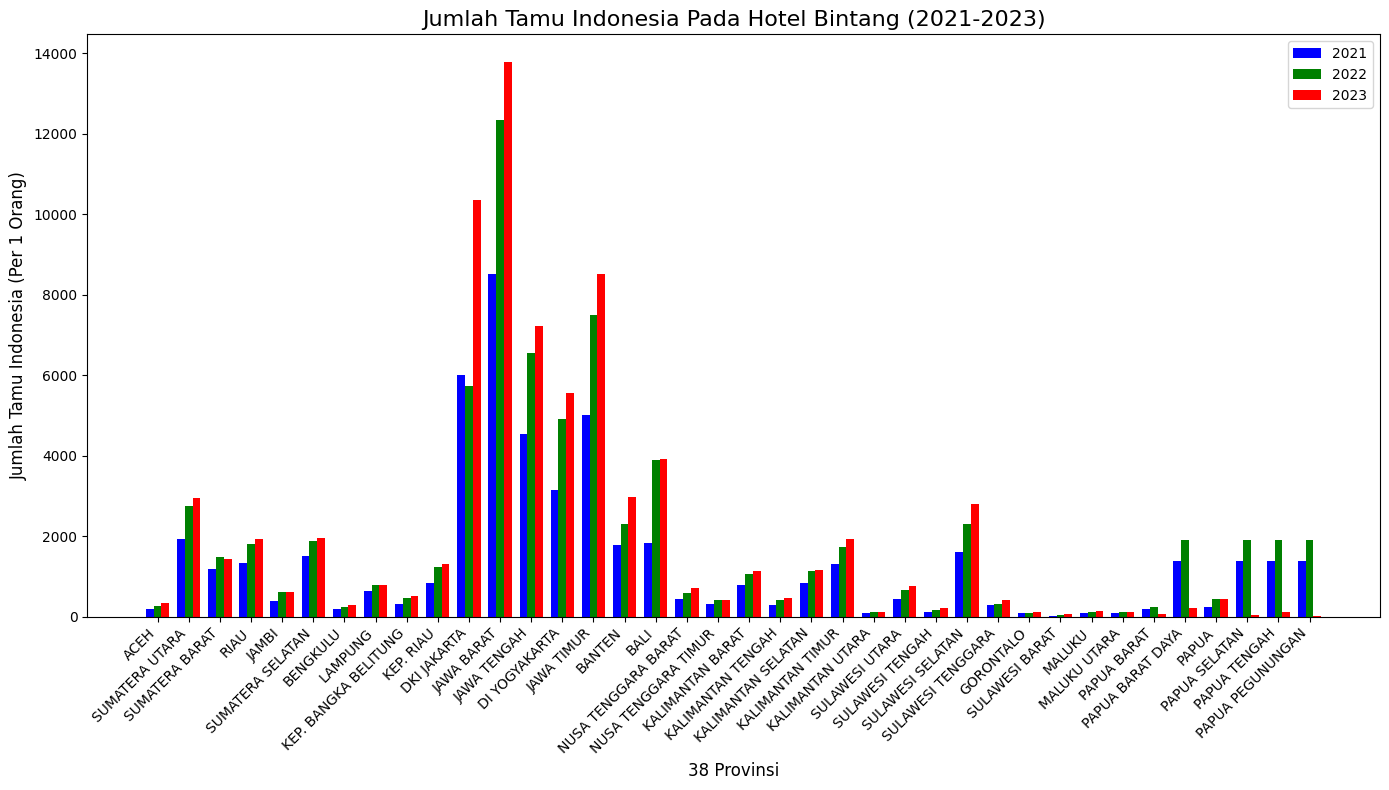

In [189]:
# --------Data TAMU INDONESIA YANG MENGINAP DI HOTEL

plt.figure(figsize=(14, 8))

# Converting the numerical columns to proper data types
data_Jumlah_Tamu_Indonesia_Hotel['2021'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2021'], errors='coerce')
data_Jumlah_Tamu_Indonesia_Hotel['2022'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2022'], errors='coerce')
data_Jumlah_Tamu_Indonesia_Hotel['2023'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(data_Jumlah_Tamu_Indonesia_Hotel))

# Plot bars for each year
plt.bar(index, data_Jumlah_Tamu_Indonesia_Hotel['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_Jumlah_Tamu_Indonesia_Hotel['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_Jumlah_Tamu_Indonesia_Hotel['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Jumlah Tamu Indonesia Pada Hotel Bintang (2021-2023)', fontsize=16)
plt.xlabel('38 Provinsi', fontsize=12)
plt.ylabel('Jumlah Tamu Indonesia (Per 1 Orang)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_Jumlah_Tamu_Indonesia_Hotel['38 Provinsi'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


**Kesimpulan**

- Berdasarkan grafik yang menampilkan jumlah tamu domestik di hotel berbintang di Indonesia dari tahun 2021 hingga 2023, berikut adalah beberapa kesimpulan per poin:
     - Penurunan dan Kenaikan Jumlah Tamu Secara Keseluruhan: Terjadi peningkatan secara konsisten dari 2021 hingga 2023 di beberapa wilayah utama. Pada beberapa provinsi seperti DKI Jakarta, Jawa Barat, Bali, dan Jawa Timur, jumlah tamu pada tahun 2023 terlihat lebih tinggi dibandingkan dengan tahun 2021 dan 2022. Bali khususnya mengalami lonjakan yang signifikan pada tahun 2023.
     - Provinsi dengan Jumlah Tamu Terbesar: DKI Jakarta, Jawa Barat, dan Bali adalah provinsi dengan jumlah tamu tertinggi pada ketiga tahun (2021, 2022, 2023).
     - Perbandingan Tahun per Tahun: Tahun 2021 (biru) menunjukkan penurunan jumlah tamu di sebagian besar provinsi akibat dampak pandemi COVID-19. Pada 2022 (hijau), terlihat pemulihan dengan peningkatan di beberapa wilayah, dan tren ini berlanjut pada 2023 (merah), mencerminkan pemulihan pariwisata yang semakin kuat.

**2. Data Tamu Asing yang Menginap di Hotel Berbintang 2021-2023**

<Figure size 1400x800 with 0 Axes>

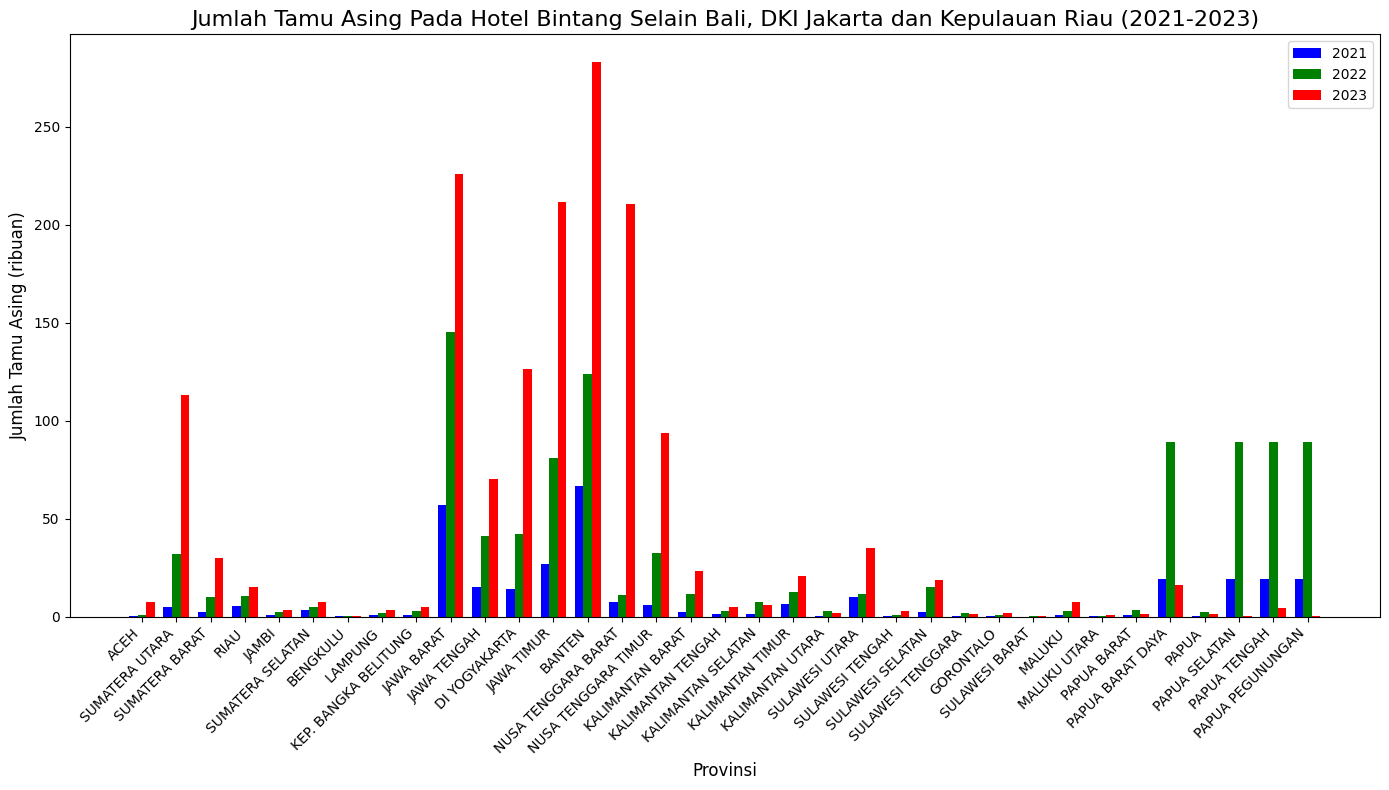

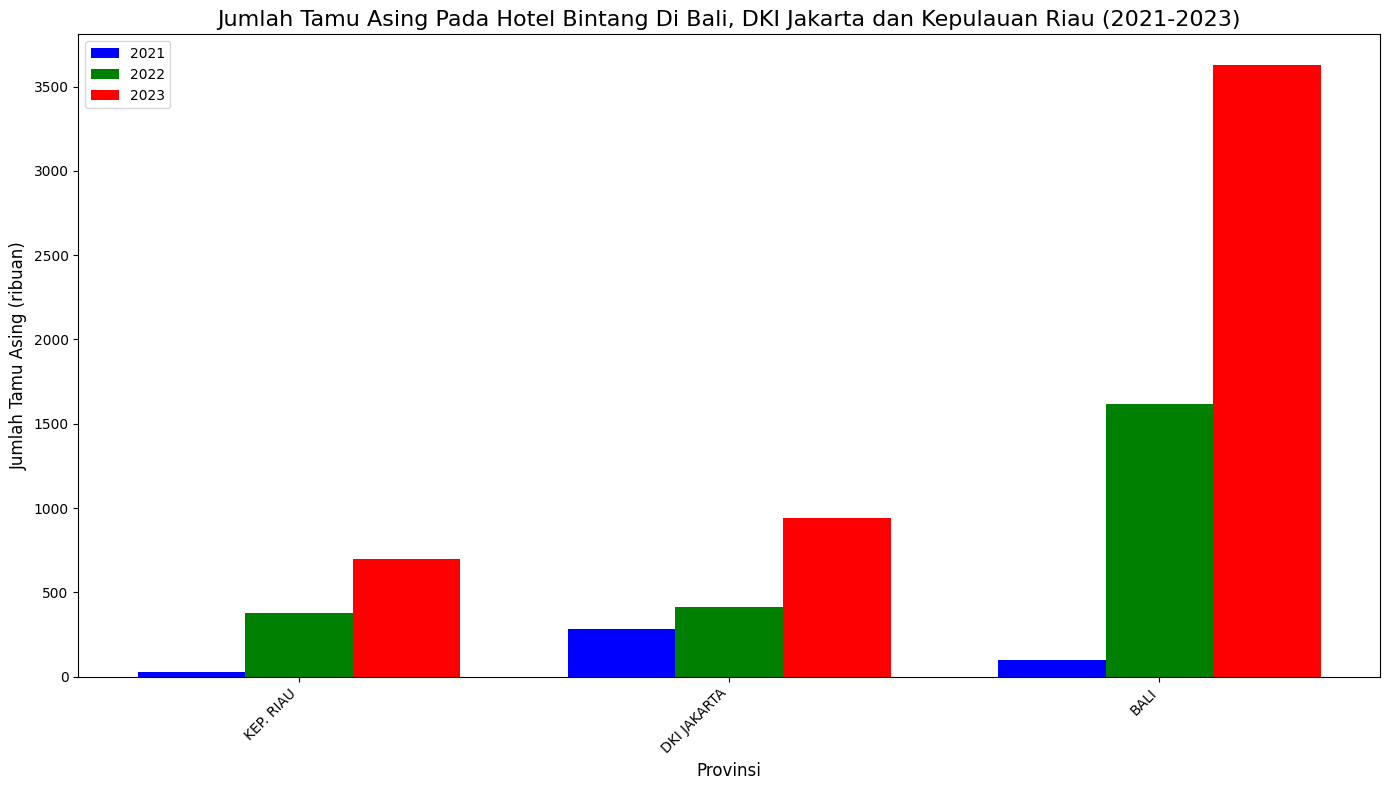

In [190]:

#--------Data TAMU ASING YANG MENGINAP DI HOTEL

plt.figure(figsize=(14, 8))

# # Plot the data for 2021, 2022, and 2023

# Asumsi data_Jumlah_Tamu_Asing_Hotel sudah siap, dan provinsi menjadi index
# Pastikan kolom numeric diubah ke tipe numerik
data_Jumlah_Tamu_Asing_Hotel['2021'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2021'], errors='coerce')
data_Jumlah_Tamu_Asing_Hotel['2022'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2022'], errors='coerce')
data_Jumlah_Tamu_Asing_Hotel['2023'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2023'], errors='coerce')

# Pisahkan data tanpa 'BALI'
data_non_bali_dkk = data_Jumlah_Tamu_Asing_Hotel.query("`PROVINSI` != 'BALI'")
data_bali = data_Jumlah_Tamu_Asing_Hotel.query("`PROVINSI` == 'BALI' or `PROVINSI` == 'DKI JAKARTA' or `PROVINSI` == 'KEP. RIAU'")
data_non_bali_dkk = data_non_bali_dkk.query("`PROVINSI` != 'DKI JAKARTA'")
data_non_bali_dkk = data_non_bali_dkk.query("`PROVINSI` != 'KEP. RIAU'")

data_tamu_asing_final = data_non_bali_dkk

# Bar plot untuk data non-Bali
plt.figure(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(data_tamu_asing_final))

# Plot bars
plt.bar(index, data_tamu_asing_final['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_tamu_asing_final['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_tamu_asing_final['2023'], bar_width, label='2023', color='r')

# Tambahkan provinsi ke x-axis
plt.xticks(index + bar_width, data_tamu_asing_final['PROVINSI'], rotation=45, ha='right')

# Label dan legend
plt.title('Jumlah Tamu Asing Pada Hotel Bintang Selain Bali, DKI Jakarta dan Kepulauan Riau (2021-2023)', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Tamu Asing (ribuan)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#------------------Menampilkan Data Hanya Untuk Bali, Kep. Riau, dan DKI Jakarta Saja---------------------------#
plt.figure(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(data_bali))

# Plot bars for each year
plt.bar(index, data_bali['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_bali['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_bali['2023'], bar_width, label='2023', color='r')

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_bali['PROVINSI'], rotation=45, ha='right')

# Adding labels and title
plt.title('Jumlah Tamu Asing Pada Hotel Bintang Di Bali, DKI Jakarta dan Kepulauan Riau (2021-2023)', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Tamu Asing (ribuan)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


**Kesimpulan**

- Berdasarkan grafik kedua yang menunjukkan jumlah tamu asing di hotel berbintang di Indonesia dari 2021 hingga 2023, berikut adalah beberapa poin kesimpulan:
     - Tahun 2022 (hijau) menunjukkan pemulihan, terutama di provinsi seperti Bali, DKI Jakarta, dan Kepulauan Riau, di mana jumlah tamu asing mulai meningkat kembali.
Pada 2023 (merah), terjadi lonjakan tajam di Bali dengan jumlah tamu asing yang jauh lebih tinggi dibandingkan tahun-tahun sebelumnya, menandakan pemulihan besar pariwisata internasional di wilayah tersebut.
     - Bali tetap menjadi destinasi utama bagi tamu asing, dengan perbedaan yang signifikan dibandingkan provinsi lainnya, khususnya pada 2023, di mana jumlah tamu asing mencapai lebih dari 3.500 ribu.

**3. Data Pengeluaran Wisatawan Mancanegara 2021-2023**

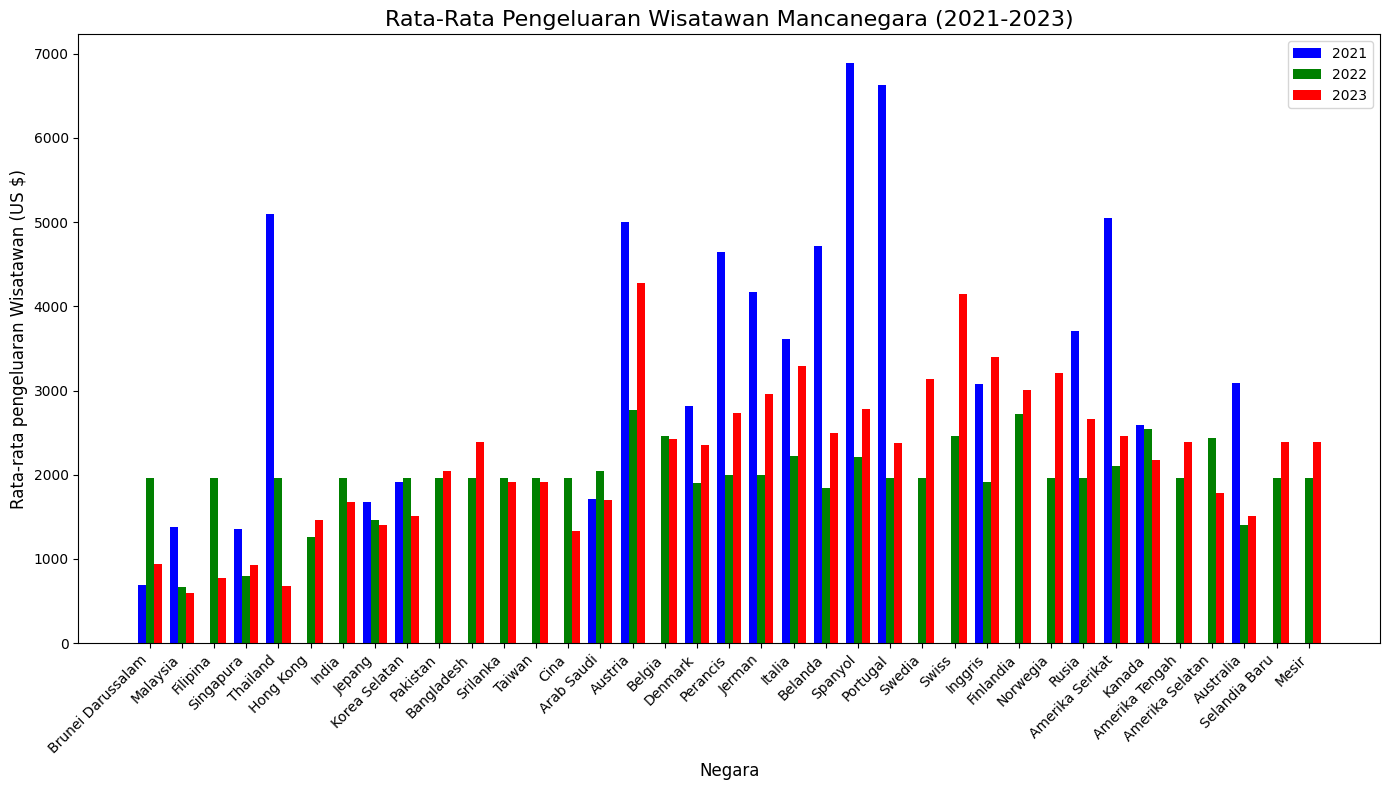

In [191]:
#merge data Rata-rata Pengeluaran Wisatawan
Income_1 = data_Pengeluaran_Wisatawan_1
Income_2 = data_Pengeluaran_Wisatawan_2

rata_rata_merge = pd.merge(Income_1, Income_2, on="Asal")
rata_rata_merge = rata_rata_merge.loc[:, ["Asal", "2021", "2022", "2023"]]
rata_rata_merge.index += 1

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
rata_rata_merge['2021'] = pd.to_numeric(rata_rata_merge['2021'], errors='coerce')
rata_rata_merge['2022'] = pd.to_numeric(rata_rata_merge['2022'], errors='coerce')
rata_rata_merge['2023'] = pd.to_numeric(rata_rata_merge['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(rata_rata_merge))

# Plot bars for each year
plt.bar(index, rata_rata_merge['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, rata_rata_merge['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, rata_rata_merge['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Pengeluaran Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata pengeluaran Wisatawan (US $)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, rata_rata_merge['Asal'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**Kesimpulan**

- Berdasarkan grafik rata-rata pengeluaran wisatawan mancanegara per negara dari 2021 hingga 2023, berikut adalah beberapa kesimpulan::
     - Negara-Negara dengan Pengeluaran Tertinggi: Wisatawan dari Amerika Serikat, Inggris, dan Rusia tampaknya tetap menjadi yang paling tinggi dalam hal pengeluaran pada ketiga tahun tersebut. Pada 2023, beberapa negara Eropa lainnya seperti Prancis dan Italia juga mengalami peningkatan pengeluaran yang cukup signifikan.
     - Penurunan Pengeluaran pada 2022 (Hijau): Pada tahun 2022, pengeluaran rata-rata per wisatawan dari beberapa negara seperti Amerika Serikat dan Rusia tampak menurun. Hal ini mungkin disebabkan oleh pengurangan pembatasan perjalanan yang meningkatkan volume wisatawan, namun pengeluaran per wisatawan lebih rendah.
     - Peningkatan Pengeluaran pada 2023 (Merah): Di banyak negara seperti Jepang, Korea Selatan, dan Australia, pengeluaran wisatawan pada tahun 2023 menunjukkan peningkatan signifikan. Ini menunjukkan bahwa pariwisata mulai pulih dengan lebih banyak wisatawan kembali melakukan perjalanan, dan pengeluaran per wisatawan juga meningkat.

**4. Data Lama Tinggal Wisatawan Mancanegara 2021-2023**

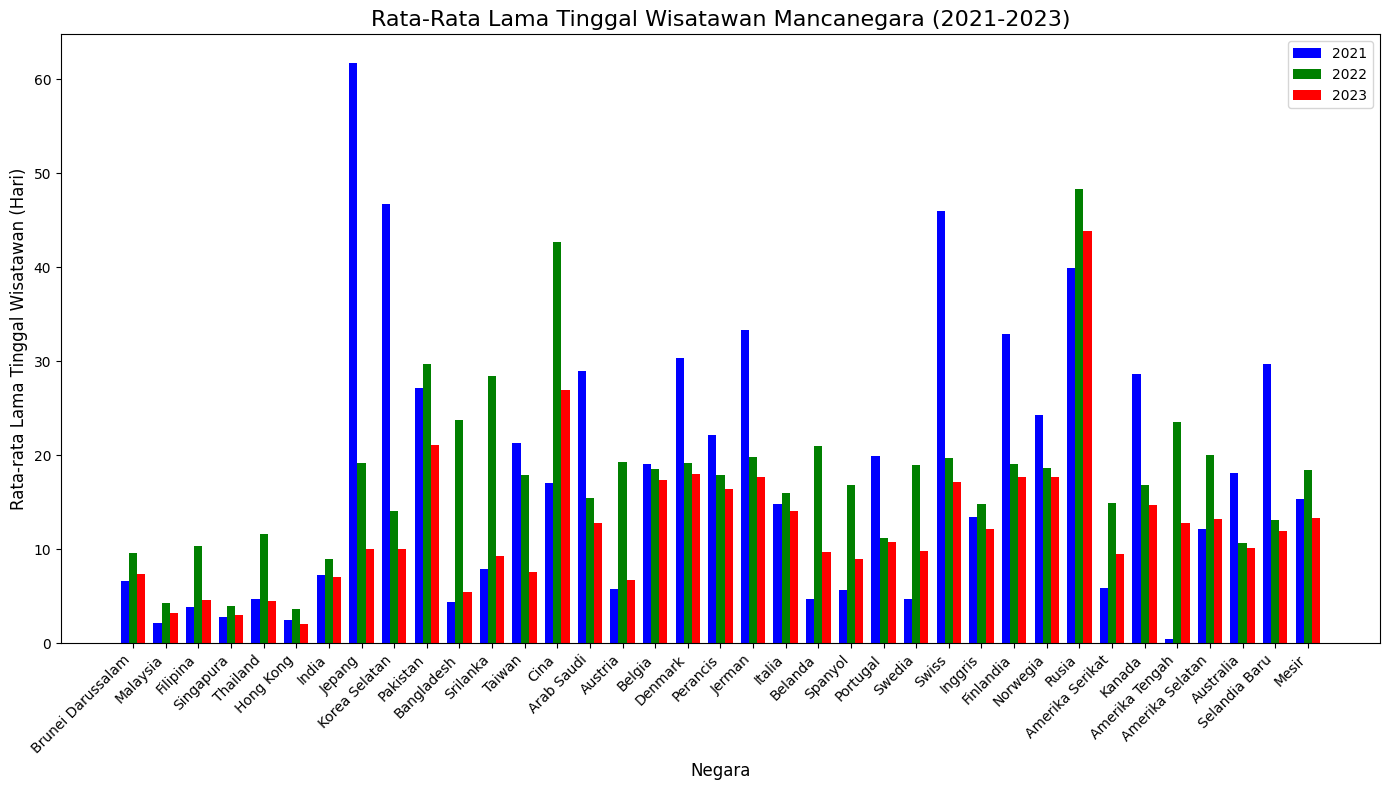

In [192]:
#merge data rata rata wisatawan tinggal
avg_live1 = data_Lama_Tinggal_Wisatawan_Mancanegara_1
avg_live2 = data_Lama_Tinggal_Wisatawan_Mancanegara_2

avg_merge = pd.merge(avg_live1, avg_live2, on="Asal Wisatawan")
avg_merge = avg_merge.loc[:, ["Asal Wisatawan", "2021", "2022", "2023"]]
avg_merge.index += 1

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
avg_merge['2021'] = pd.to_numeric(avg_merge['2021'], errors='coerce')
avg_merge['2022'] = pd.to_numeric(avg_merge['2022'], errors='coerce')
avg_merge['2023'] = pd.to_numeric(avg_merge['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(avg_merge))

# Plot bars for each year
plt.bar(index, avg_merge['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, avg_merge['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, avg_merge['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Lama Tinggal Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata Lama Tinggal Wisatawan (Hari)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, avg_merge['Asal Wisatawan'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



**Kesimpulan**

- Berdasarkan data pengeluaran rata-rata, wisatawan dari Spanyol dan Portugal menghabiskan uang paling banyak, namun waktu tinggal mereka di Indonesia relatif singkat. Hal ini menunjukkan bahwa mereka cenderung fokus pada satu lokasi untuk tujuan rekreasi.
- Wisatawan Jepang, meskipun pengeluarannya tidak sebesar negara lain, memiliki durasi tinggal yang lebih lama. Ini menunjukkan bahwa orang Jepang mungkin lebih nyaman menetap di Indonesia, bukan hanya sebagai turis, tetapi juga sebagai penduduk atau pekerja.

**5. Data Akomodasi Pada Hotel Bintang 2021-2023**

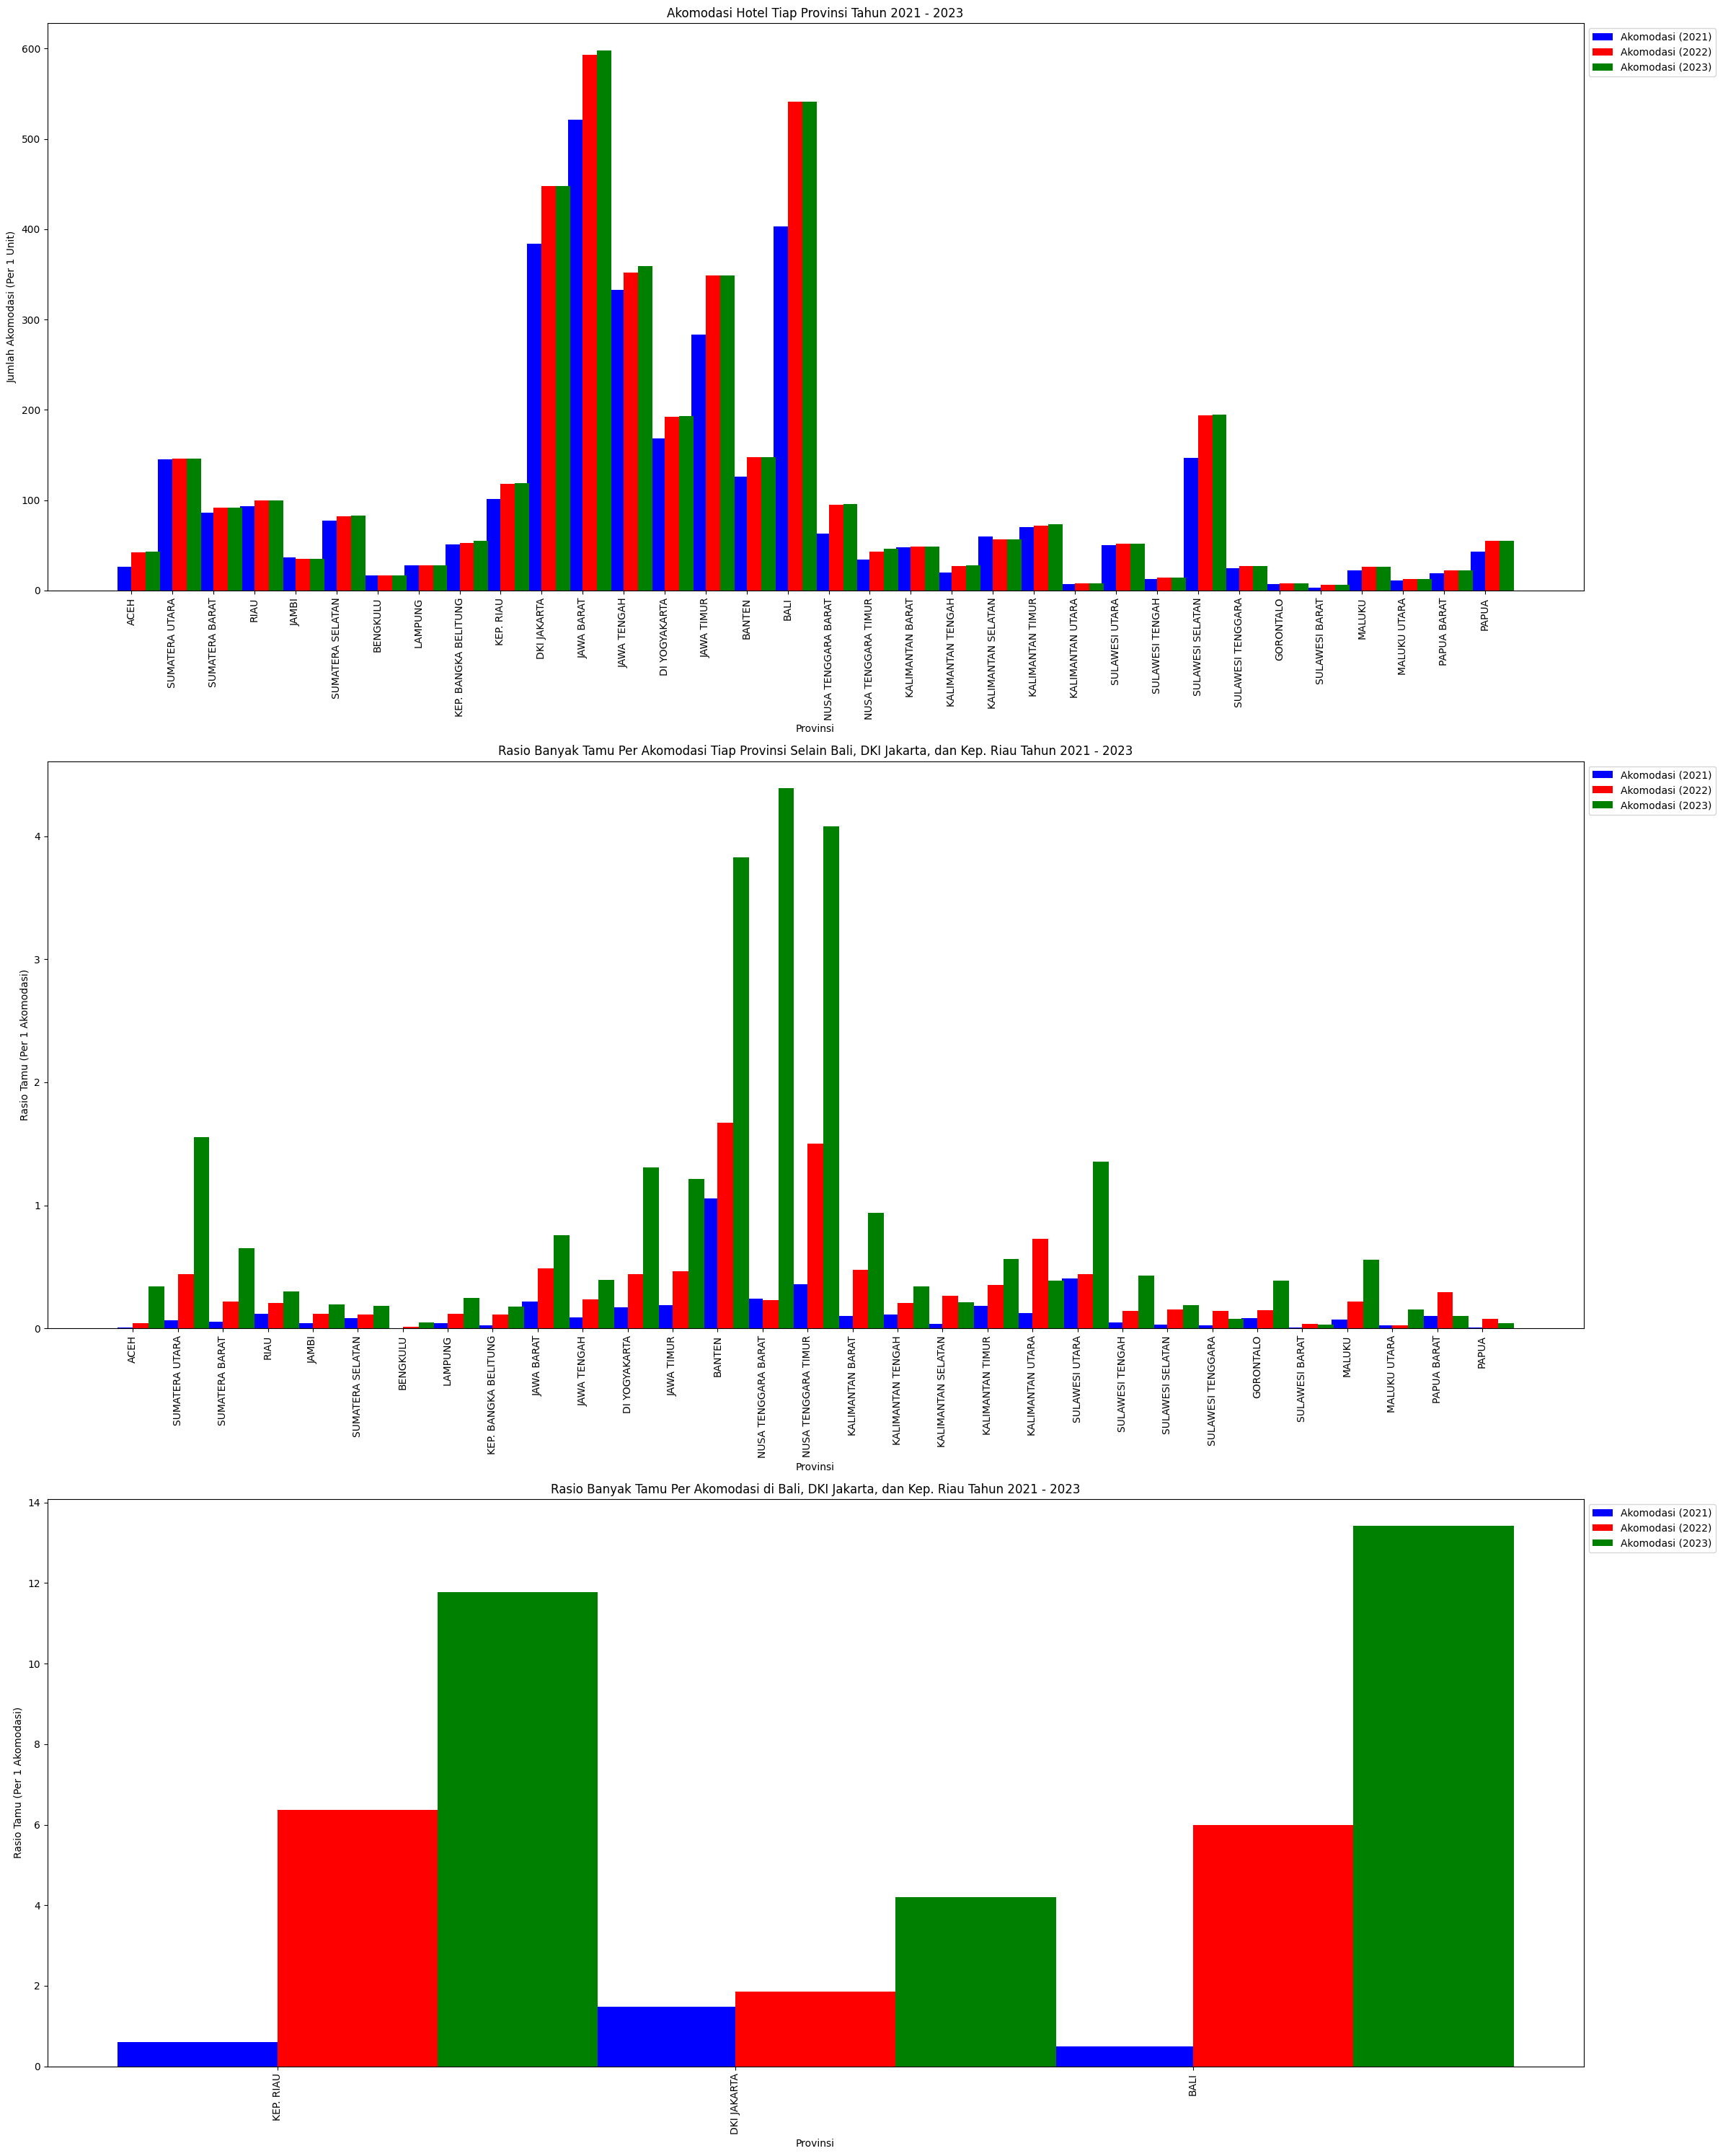

In [193]:
#Merge tahun akomodasi hotel
acomodate_1 = data_Akomodasi_Hotel_1
acomodate_2 = data_Akomodasi_Hotel_2
aco_merged = pd.merge(acomodate_1, acomodate_2, on='Provinsi')
aco_merged.index += 1

aco_merged.head(10)

temp_tamu_asing = data_Jumlah_Tamu_Asing_Hotel.drop(34).drop(36).drop(37).drop(38)

temp_tamu_asing[['2021', '2022', '2023']] = temp_tamu_asing[['2021', '2022', '2023']].apply(pd.to_numeric)
# temp_tamu_asing.info()

# aco_merged = aco_merged.drop(['Akomodasi 2019', 'Akomodasi 2020', 'Kamar 2019', 'Kamar 2020', 'Tempat Tidur 2019', 'Tempat Tidur 2020'], axis=1)
aco_merged = aco_merged.loc[:, ['Provinsi', 'Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023', 
                                'Kamar 2021', 'Kamar 2022', 'Kamar 2023', 
                                'Tempat Tidur 2021', 'Tempat Tidur 2022', 'Tempat Tidur 2023']]

numeric_col = ['Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023', 
                                'Kamar 2021', 'Kamar 2022', 'Kamar 2023', 
                                'Tempat Tidur 2021', 'Tempat Tidur 2022', 'Tempat Tidur 2023']

aco_merged[numeric_col] = aco_merged[numeric_col].apply(pd.to_numeric)
numeric_col = ['2021', '2022', '2023']

data_Jumlah_Tamu_Asing_Hotel
temp_tamu_asing[numeric_col] += data_Jumlah_Tamu_Asing_Hotel[numeric_col]
temp_tamu_asing[numeric_col] /= aco_merged[['Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023']].replace(0, np.nan).fillna(1).astype(float).values 

data_bali_etc = temp_tamu_asing.query("`PROVINSI` == 'BALI' or `PROVINSI` == 'DKI JAKARTA' or `PROVINSI` == 'KEP. RIAU'")
temp_tamu_asing = temp_tamu_asing.query("`PROVINSI` != 'BALI' and `PROVINSI` != 'DKI JAKARTA' and `PROVINSI` != 'KEP. RIAU'")


fig, ax = plt.subplots(3, 1, figsize=(24, 30))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(aco_merged))

ax[0].bar(index, aco_merged['Akomodasi 2021'], bar_width, label='Akomodasi (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], aco_merged['Akomodasi 2022'], bar_width, label='Akomodasi (2022)', color='red')
ax[0].bar([i + 2 * bar_width for i in index], aco_merged['Akomodasi 2023'], bar_width, label='Akomodasi (2023)', color='green')

ax[0].set_title('Akomodasi Hotel Tiap Provinsi Tahun 2021 - 2023')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Jumlah Akomodasi (Per 1 Unit)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(aco_merged['Provinsi'], rotation=90)
ax[0].legend()

index = range(len(temp_tamu_asing))

ax[1].bar(index, temp_tamu_asing['2021'], bar_width, label='Akomodasi (2021)', color='blue')
ax[1].bar([i + bar_width for i in index], temp_tamu_asing['2022'], bar_width, label='Akomodasi (2022)', color='red')
ax[1].bar([i + 2 * bar_width for i in index], temp_tamu_asing['2023'], bar_width, label='Akomodasi (2023)', color='green')

ax[1].set_title('Rasio Banyak Tamu Per Akomodasi Tiap Provinsi Selain Bali, DKI Jakarta, dan Kep. Riau Tahun 2021 - 2023')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Rasio Tamu (Per 1 Akomodasi)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(temp_tamu_asing['PROVINSI'], rotation=90)
ax[1].legend()

index = range(len(data_bali_etc))
ax[2].bar(index, data_bali_etc['2021'], bar_width, label='Akomodasi (2021)', color='blue')
ax[2].bar([i + bar_width for i in index], data_bali_etc['2022'], bar_width, label='Akomodasi (2022)', color='red')
ax[2].bar([i + 2 * bar_width for i in index], data_bali_etc['2023'], bar_width, label='Akomodasi (2023)', color='green')

ax[2].set_title('Rasio Banyak Tamu Per Akomodasi di Bali, DKI Jakarta, dan Kep. Riau Tahun 2021 - 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Rasio Tamu (Per 1 Akomodasi)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(data_bali_etc['PROVINSI'], rotation=90)
ax[2].legend()

ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Kesimpulan**

Berdasarkan visualisasi diatas, maka bisa disimpulkan bahwa:
- Terdapat peningkatan signifikan jumlah akomodasi dari tahun 2021 ke 2022, namun pada tahun 2023, peningkatannya tidak berbeda jauh dibandingkan tahun 2022.
- Provinsi dengan jumlah akomodasi tertinggi berturut-turut adalah Jawa Barat, diikuti oleh Bali, dan kemudian DKI Jakarta.
- Semakin banyak kunjungan tamu, rasio jumlah tamu per akomodasi juga cenderung meningkat.
- Peningkatan rasio jumlah tamu per akomodasi tertinggi terjadi di Bali, diikuti oleh DKI Jakarta dan Kepulauan Riau.
- Pada tahun 2023, rasio jumlah tamu per akomodasi mengalami peningkatan yang signifikan dibandingkan tahun 2022, menunjukkan bahwa peningkatan jumlah tamu pada tahun 2023 lebih besar dibandingkan pertumbuhan jumlah akomodasinya.

**6. Perbandingan Jumlah Wisatawan Asing vs Lokal Per-Provinsi Pada Hotel Berbintang 2021-2023**

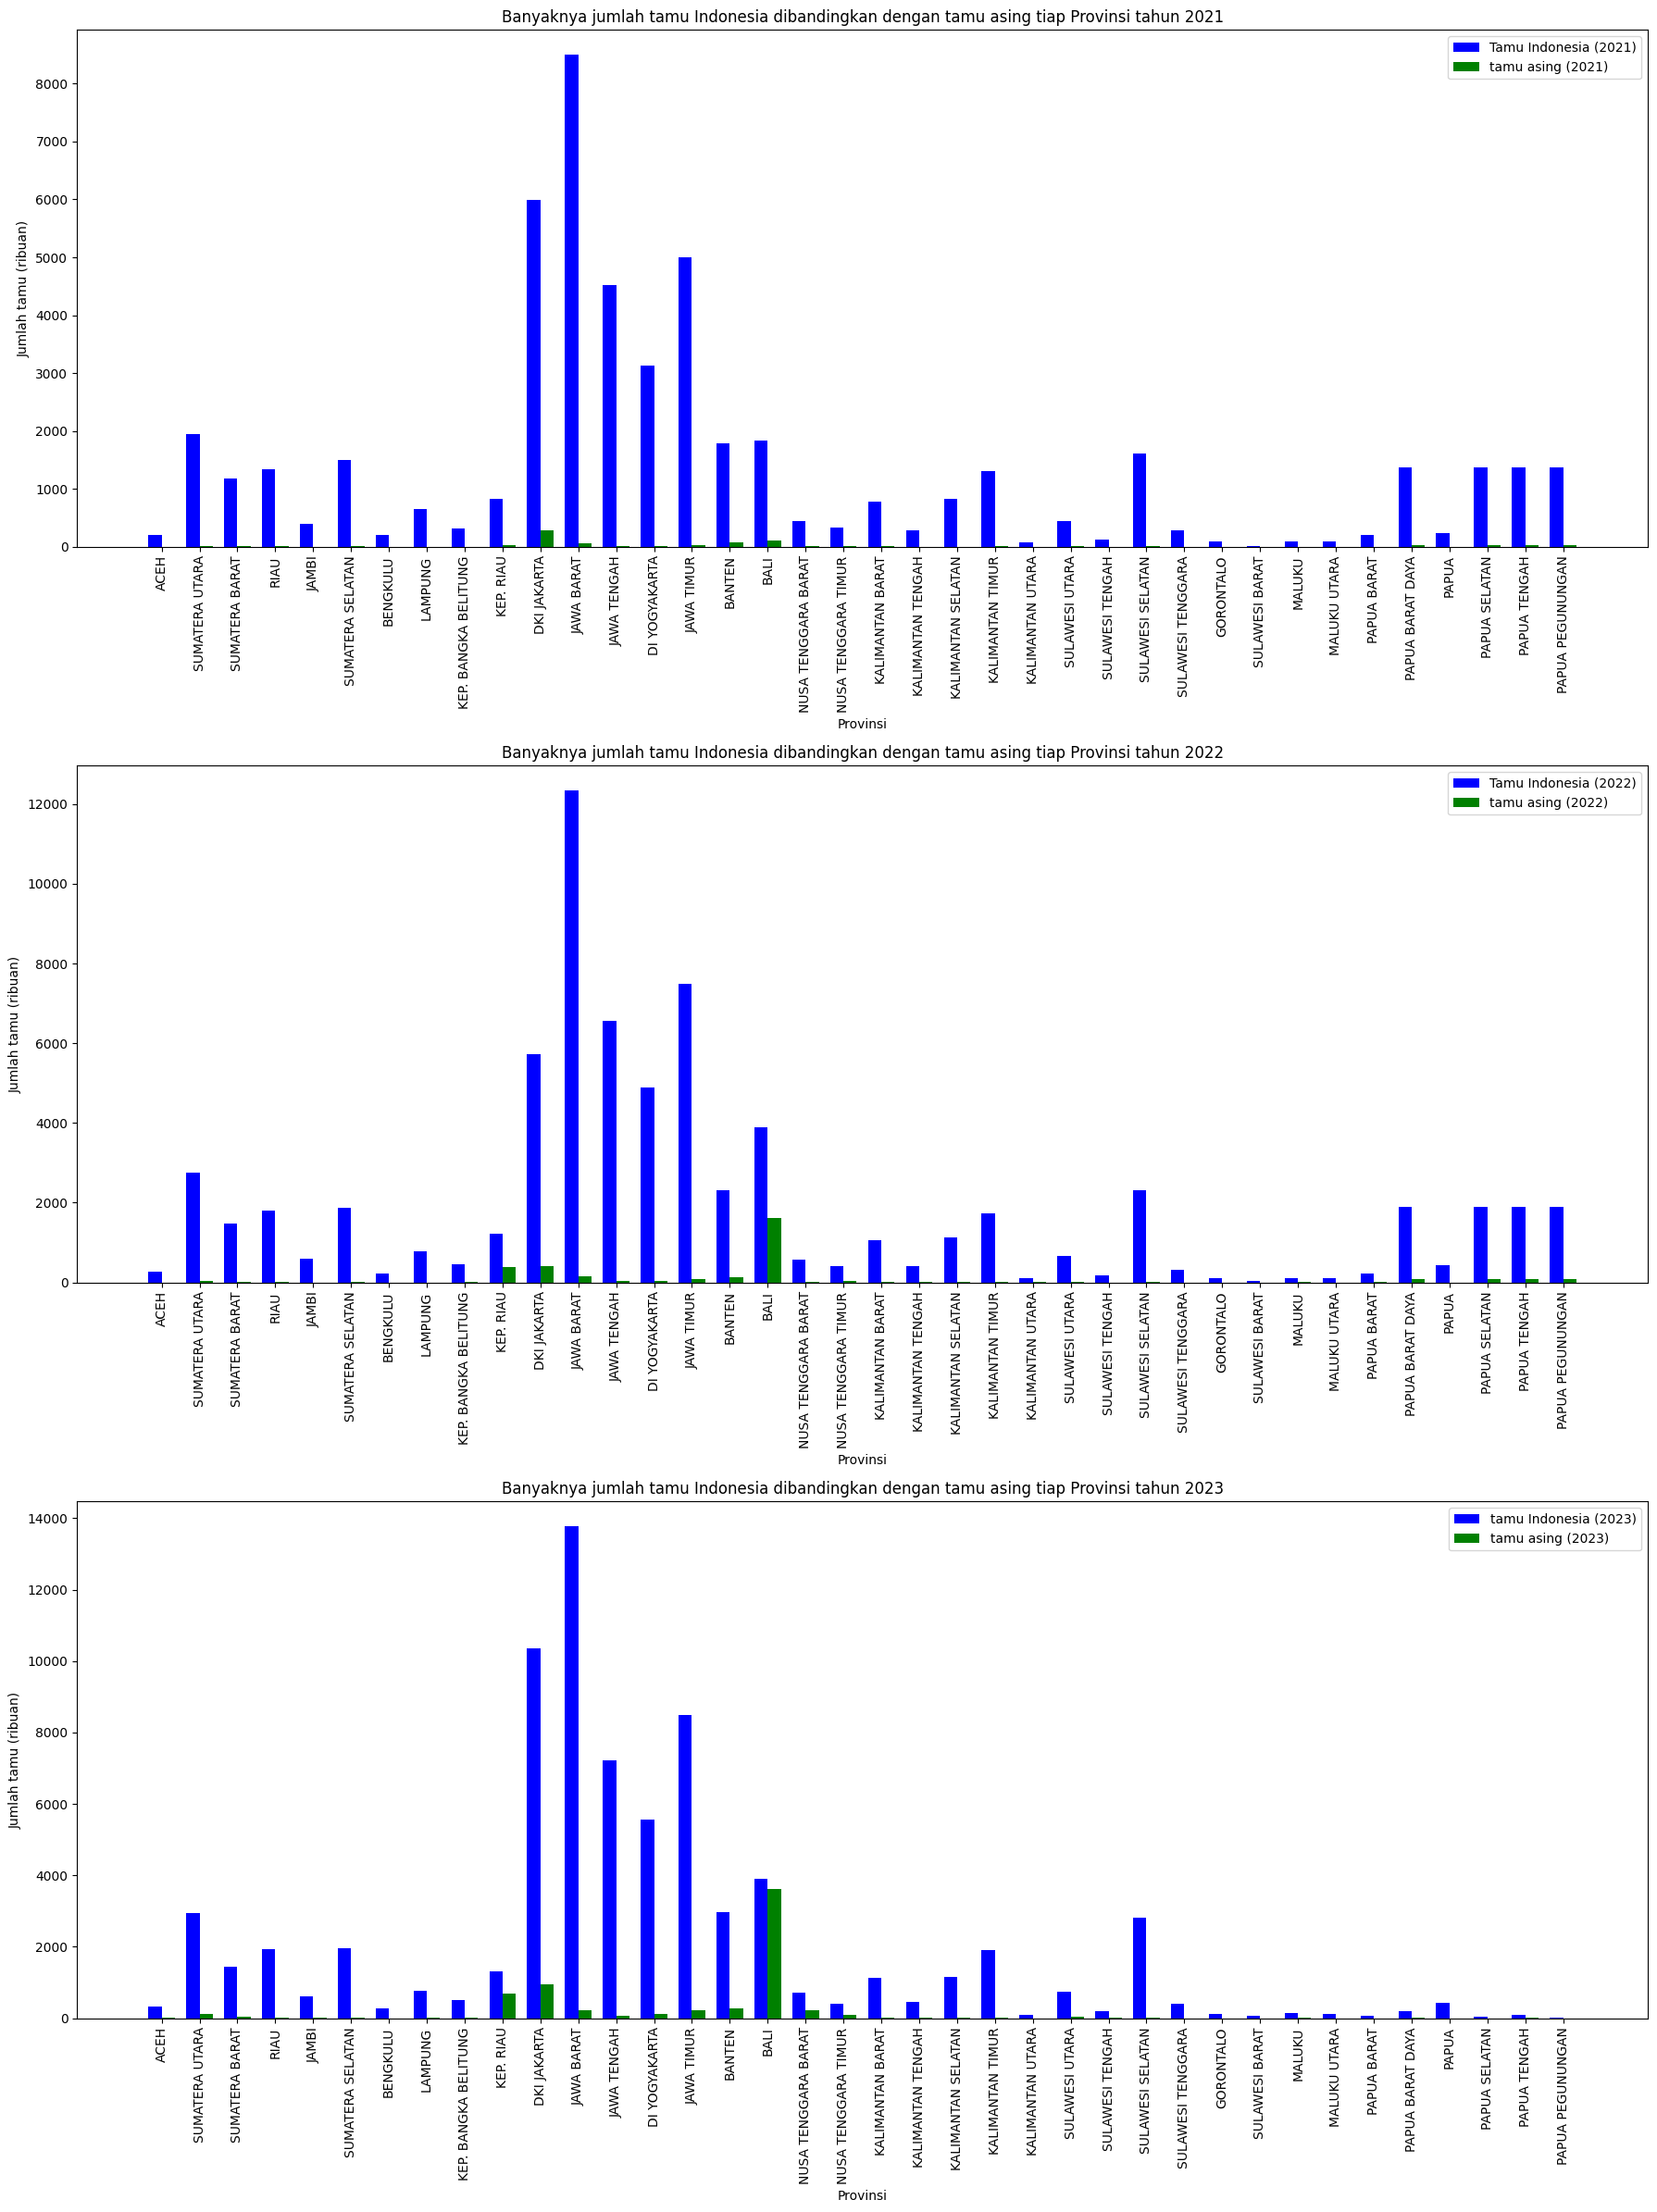

In [194]:
# merge tamu indonesia dan asing
temp_indo = data_Jumlah_Tamu_Indonesia_Hotel
temp_asing = data_Jumlah_Tamu_Asing_Hotel

# Clean and structure the Indonesian guests dataset
temp_indo.columns = ['Provinsi', '2021_indo', '2022_indo', '2023_indo']
# temp_indo = temp_indo.drop([0, 1, 40])  # Remove unnecessary rows
temp_indo.reset_index(drop=True, inplace=True)

# Clean and structure the foreign guests dataset
temp_asing.columns = ['Provinsi', '2021_foreign', '2022_foreign', '2023_foreign']
# temp_asing = temp_asing.drop([0, 1, 40])  # Remove unnecessary rows
temp_asing.reset_index(drop=True, inplace=True)


merged_df = pd.merge(temp_indo, temp_asing, on='Provinsi')

# Convert numeric columns to floats
numeric_cols = ['2021_indo', '2022_indo', '2023_indo', '2021_foreign', '2022_foreign', '2023_foreign']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(3, 1, figsize=(18, 24))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(merged_df))

ax[0].bar(index, merged_df['2021_indo'], bar_width, label='Tamu Indonesia (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], merged_df['2021_foreign'], bar_width, label='tamu asing (2021)', color='green')

ax[0].set_title('Banyaknya jumlah tamu Indonesia dibandingkan dengan tamu asing tiap Provinsi tahun 2021')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Jumlah tamu (ribuan)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[0].legend()

ax[1].bar(index, merged_df['2022_indo'], bar_width, label='Tamu Indonesia (2022)', color='blue')
ax[1].bar([i + bar_width for i in index], merged_df['2022_foreign'], bar_width, label='tamu asing (2022)', color='green')

ax[1].set_title('Banyaknya jumlah tamu Indonesia dibandingkan dengan tamu asing tiap Provinsi tahun 2022')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Jumlah tamu (ribuan)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[1].legend()

ax[2].bar(index, merged_df['2023_indo'], bar_width, label='tamu Indonesia (2023)', color='blue')
ax[2].bar([i + bar_width for i in index], merged_df['2023_foreign'], bar_width, label='tamu asing (2023)', color='green')

ax[2].set_title('Banyaknya jumlah tamu Indonesia dibandingkan dengan tamu asing tiap Provinsi tahun 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Jumlah tamu (ribuan)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[2].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Kesimpulan**

Berdasarkan visualisasi diatas, maka bisa disimpulkan bahwa:
- Jumlah tamu domestik jauh lebih tinggi dibandingkan dengan tamu asing.
- Provinsi dengan jumlah tamu terbanyak adalah Jawa Barat.
- Dari tahun 2021 ke 2022, terdapat peningkatan yang signifikan di Jawa Barat, sedangkan provinsi lain tidak mengalami peningkatan sebesar Jawa Barat.
- Di Bali, jumlah tamu asing mengalami peningkatan dari tahun 2021 hingga 2023.
- Provinsi Papua mengalami penurunan jumlah tamu yang signifikan pada tahun 2023.

**7. Perbandingan Lama Menginap Tamu Asing vs Lokal Per-Provinsi 2021-2023**

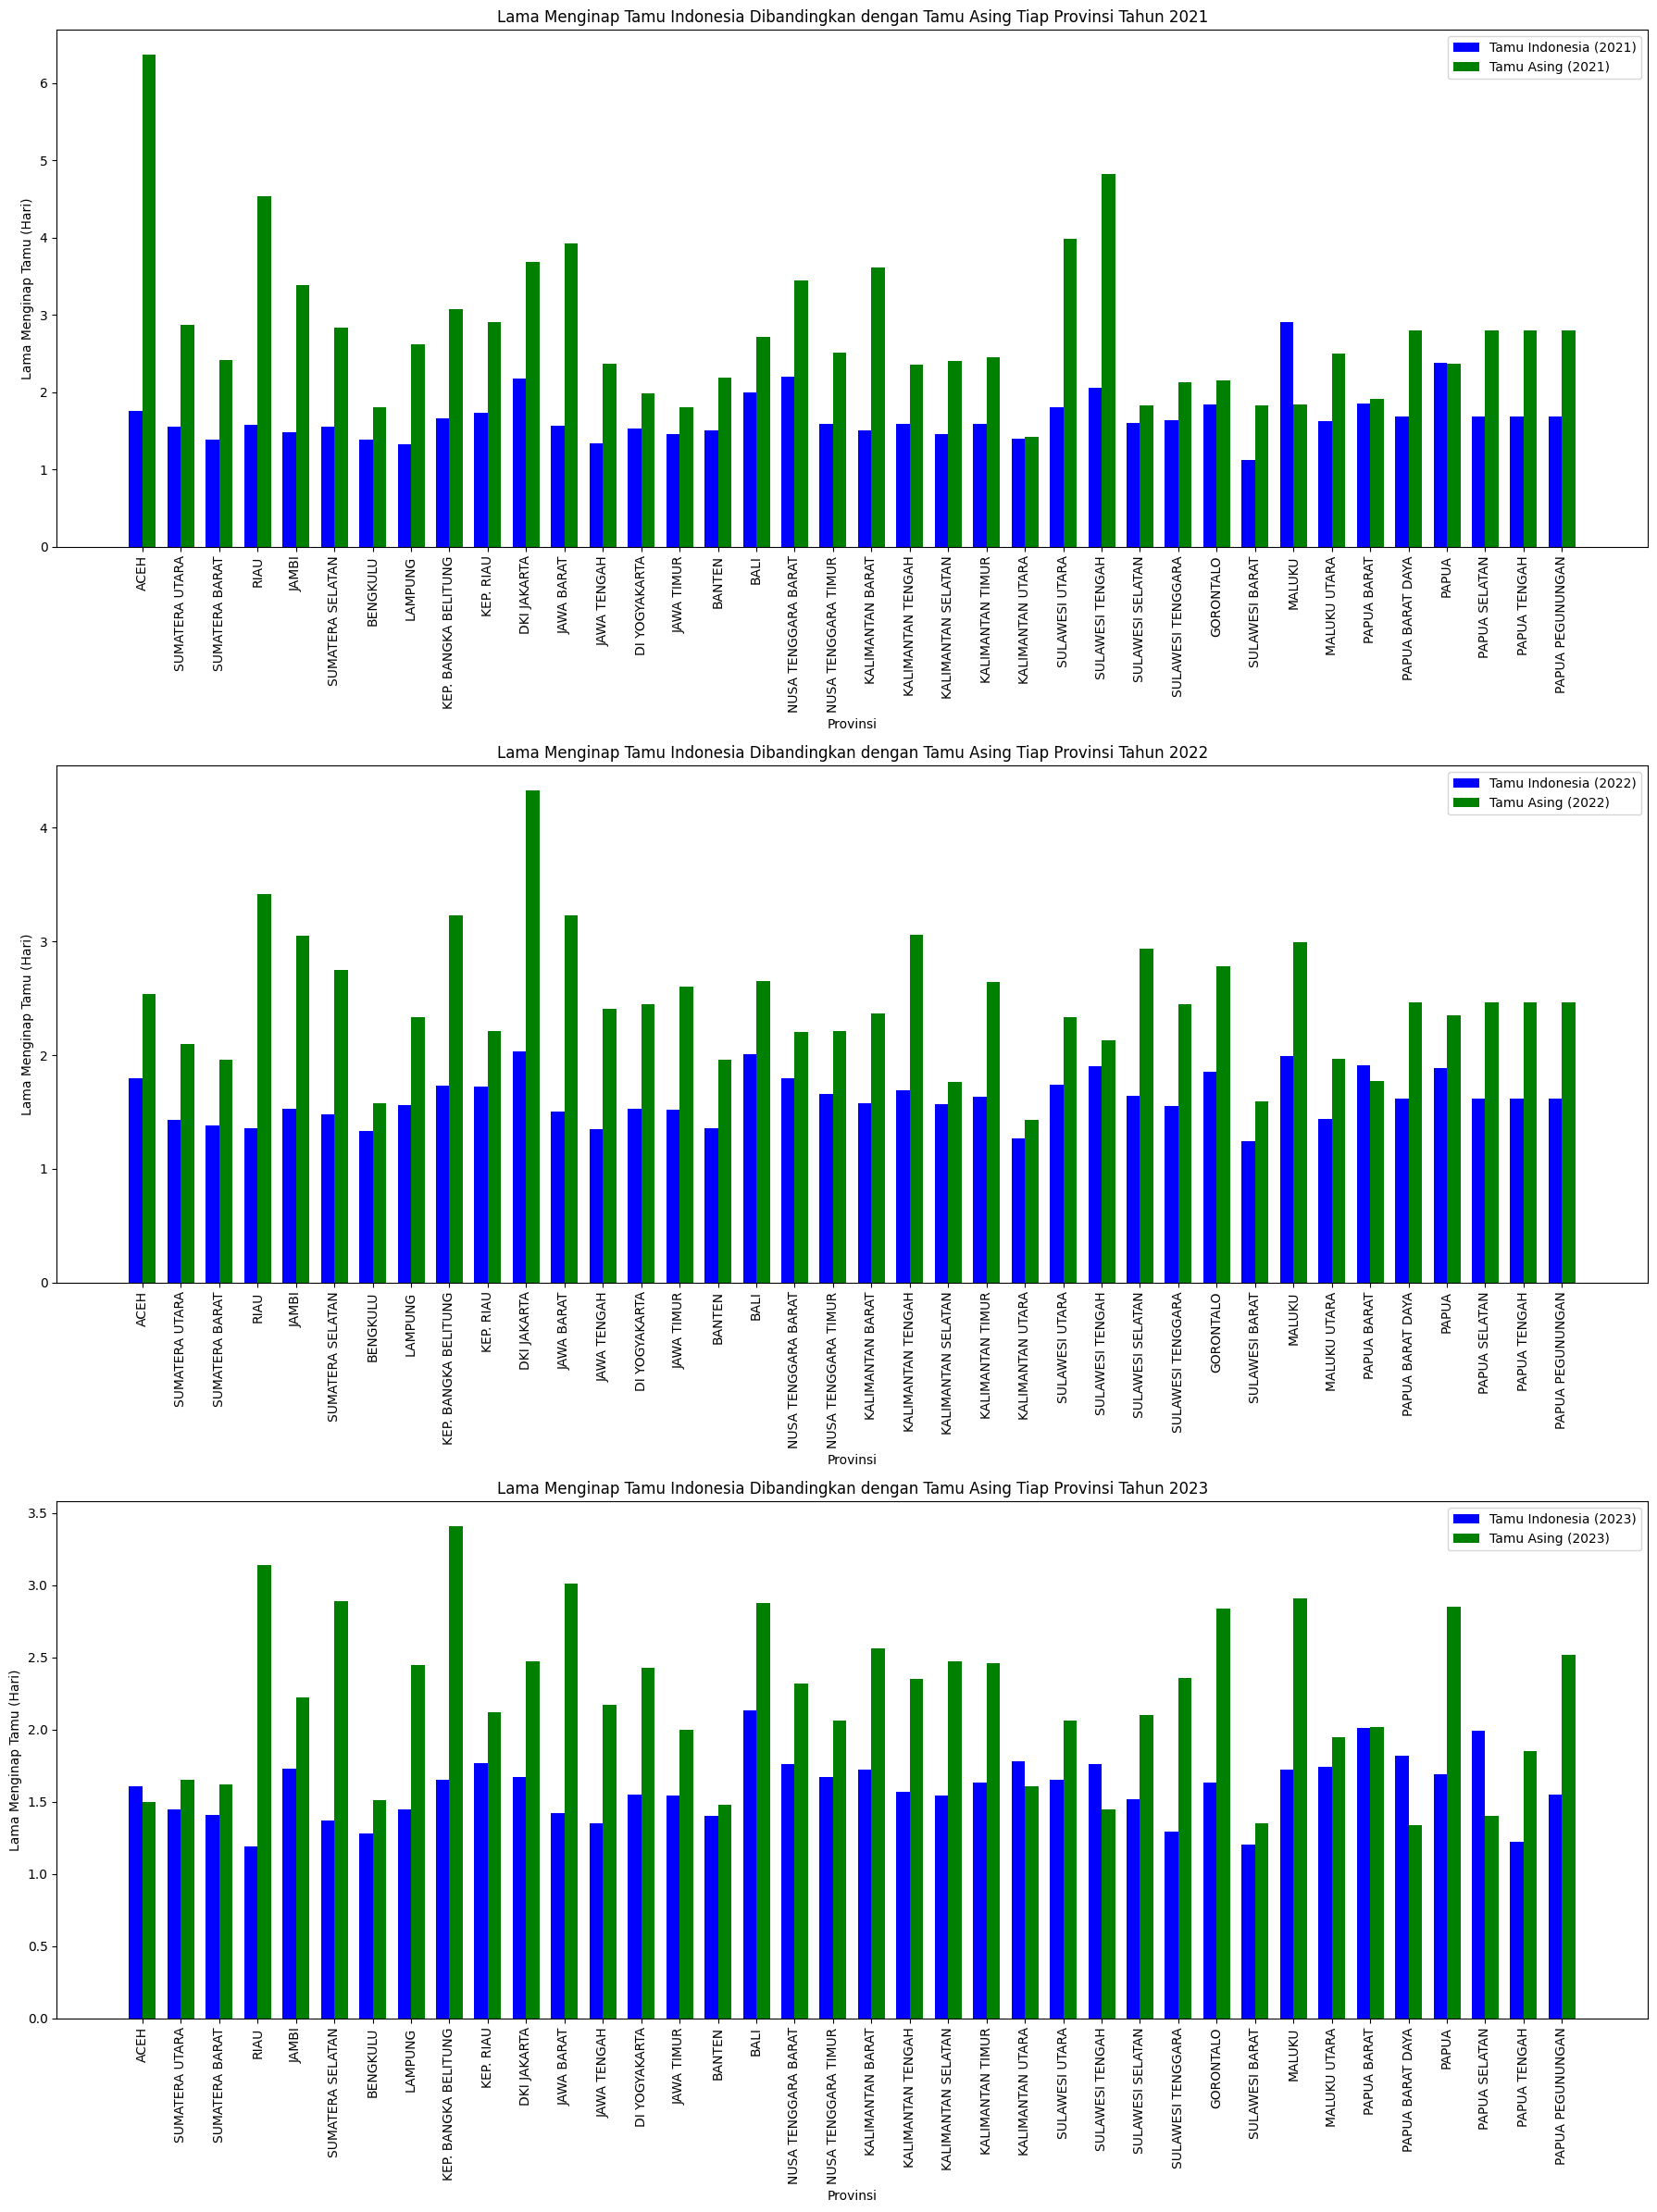

In [195]:
numeric_cols = ['2021_indo', '2022_indo', '2023_indo', '2021_foreign', '2022_foreign', '2023_foreign']

temp = data_lama_menginap_tamu_1
temp = temp.dropna().reset_index(drop=True)
mean_asing = temp[numeric_cols].apply(pd.to_numeric).mean()

data_lama_menginap_tamu_1[numeric_cols] = data_lama_menginap_tamu_1[numeric_cols].fillna(mean_asing)

# Convert numeric columns to floats
data_lama_menginap_tamu_1[numeric_cols] = data_lama_menginap_tamu_1[numeric_cols].apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(3, 1, figsize=(18, 24))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(data_lama_menginap_tamu_1))

ax[0].bar(index, data_lama_menginap_tamu_1['2021_indo'], bar_width, label='Tamu Indonesia (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2021_foreign'], bar_width, label='Tamu Asing (2021)', color='green')

ax[0].set_title('Lama Menginap Tamu Indonesia Dibandingkan dengan Tamu Asing Tiap Provinsi Tahun 2021')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Lama Menginap Tamu (Hari)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[0].legend()

ax[1].bar(index, data_lama_menginap_tamu_1['2022_indo'], bar_width, label='Tamu Indonesia (2022)', color='blue')
ax[1].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2022_foreign'], bar_width, label='Tamu Asing (2022)', color='green')

ax[1].set_title('Lama Menginap Tamu Indonesia Dibandingkan dengan Tamu Asing Tiap Provinsi Tahun 2022')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Lama Menginap Tamu (Hari)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[1].legend()

ax[2].bar(index, data_lama_menginap_tamu_1['2023_indo'], bar_width, label='Tamu Indonesia (2023)', color='blue')
ax[2].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2023_foreign'], bar_width, label='Tamu Asing (2023)', color='green')

ax[2].set_title('Lama Menginap Tamu Indonesia Dibandingkan dengan Tamu Asing Tiap Provinsi Tahun 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Lama Menginap Tamu (Hari)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[2].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


Berdasarkan visualisasi diatas, maka bisa disimpulkan bahwa:
 - Perubahan dari 2021 ke 2022: Terjadi penurunan signifikan pada lama menginap tamu asing di beberapa provinsi, terutama di Aceh, yang mengalami penurunan drastis dari sekitar 6,5 hari menjadi sekitar 2,5 hari. Lama menginap tamu domestik relatif stabil dengan sedikit peningkatan di beberapa provinsi.
 - Provinsi dengan perbedaan signifikan: Bali konsisten menunjukkan perbedaan yang cukup besar antara lama menginap tamu asing dan domestik, meskipun gap tersebut mengecil dari tahun ke tahun. Provinsi seperti Sumatera Utara, Riau, dan Kepulauan Riau juga menunjukkan perbedaan yang cukup konsisten.
 - Konvergensi: Terlihat adanya tren konvergensi, di mana perbedaan lama menginap antara tamu asing dan domestik semakin mengecil dari 2021 ke 2023 di banyak provinsi.

**8. Rata-Rata Jumlah Kunjungan Wisatawan Pada Tahun 2021-2023**

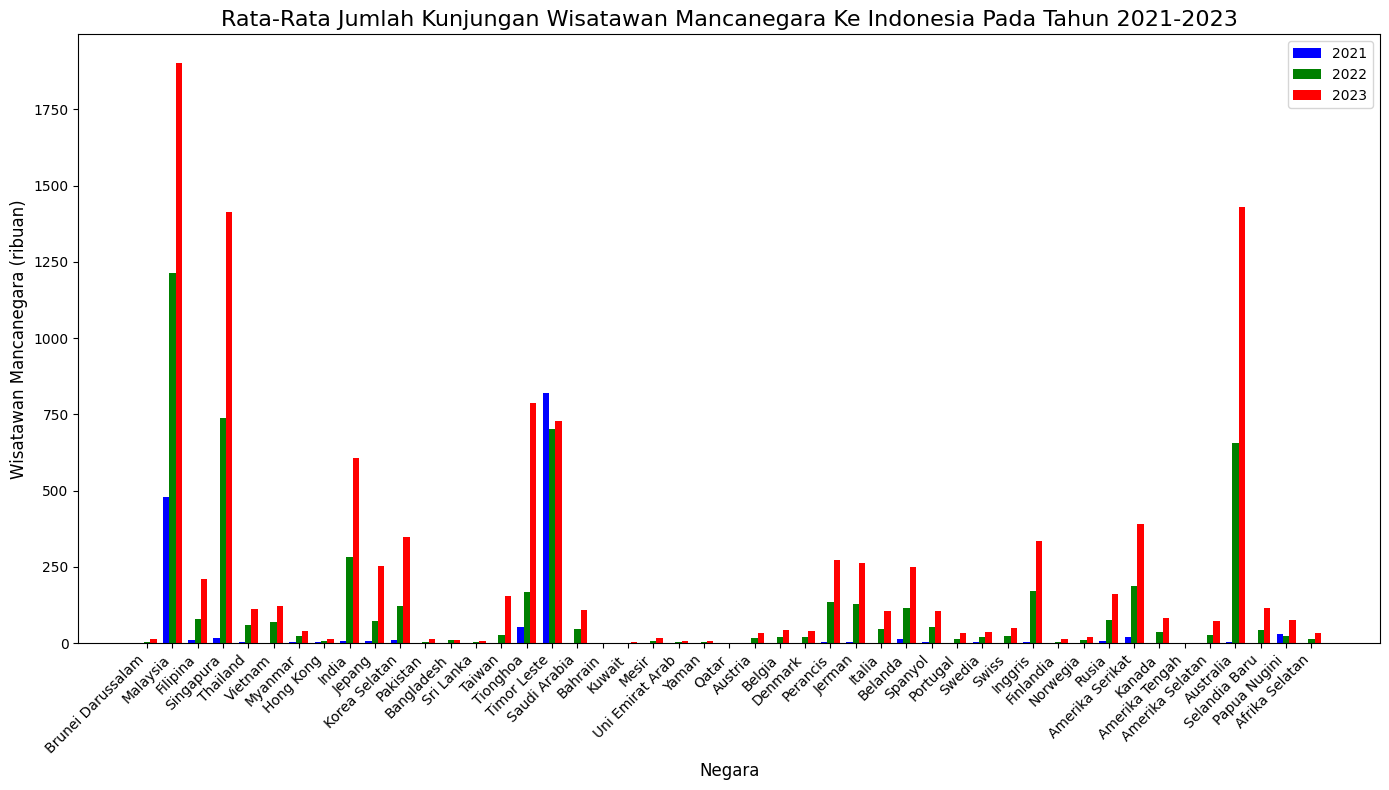

In [196]:
#merge data rata rata wisatawan tinggal

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
data_Jumlah_Kunjungan['2021'] = pd.to_numeric(data_Jumlah_Kunjungan['2021'], errors='coerce')
data_Jumlah_Kunjungan['2022'] = pd.to_numeric(data_Jumlah_Kunjungan['2022'], errors='coerce')
data_Jumlah_Kunjungan['2023'] = pd.to_numeric(data_Jumlah_Kunjungan['2023'], errors='coerce')

data_Jumlah_Kunjungan['2021'] /= 1000 
data_Jumlah_Kunjungan['2022'] /= 1000
data_Jumlah_Kunjungan['2023'] /= 1000


bar_width = 0.25
index = np.arange(len(data_Jumlah_Kunjungan))


# Plot bars for each year
plt.bar(index, data_Jumlah_Kunjungan['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_Jumlah_Kunjungan['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_Jumlah_Kunjungan['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Jumlah Kunjungan Wisatawan Mancanegara Ke Indonesia Pada Tahun 2021-2023', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Wisatawan Mancanegara (ribuan)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_Jumlah_Kunjungan['Asal Wisatawan'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


**Kesimpulan**

- Malaysia memiliki jumlah kunjungan tertinggi ke Indonesia pada tahun 2022 dan 2023 dibandingkan dengan negara lain. Jumlah kunjungan dari Selandia Baru dan Singapura juga tinggi pada tahun 2022 dan 2023, dengan jumlah kunjungan yang hampir sama pada kedua negara tersebut.
- Timor Leste menjadi negara dengan kunjungan tertinggi ke Indonesia pada tahun 2021; namun, terjadi penurunan jumlah kunjungan dari negara ini setelah tahun 2021.
- Secara umum, setiap negara mengalami peningkatan jumlah kunjungan setiap tahun, kecuali Timor Leste yang mengalami penurunan setelah tahun 2021.

### Kesimpulan, Hal Menarik Yang Dapat Ditemukan: ###

- Kesimpulan dari analisis data sektor pariwisata di Indonesia pada periode 2021-2023 menunjukkan adanya pemulihan yang positif, terlihat dari meningkatnya jumlah tamu Indonesia dan tamu asing yang menginap di hotel berbintang, terutama di provinsi Bali, DKI Jakarta, dan Jawa Barat. Data pengeluaran wisatawan mancanegara juga mencerminkan pemulihan signifikan pada tahun 2023, meskipun sempat menurun pada tahun sebelumnya. 

- Secara keseluruhan, tren ini menandakan potensi pertumbuhan lebih lanjut dalam industri pariwisata dan perhotelan di Indonesia.